In [194]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [195]:
# model parameters
def init_parameters(input_size, hidden_neurons, num_classes):
    # layer 1 parameters
    W1 = np.random.rand(input_size,hidden_neurons)
    b1 = np.random.rand(hidden_neurons)

    # layer 2 parameters
    W2 = np.random.rand(hidden_neurons,num_classes)
    b2 = np.random.rand(num_classes)
    return W1, b1, W2, b2

# activation function
def sigmoid(x):
    return 1 / (np.exp(-x) + 1)

# model forward
def forward(inp):
    o0 = inp
    o1 = o0 @ W1 + b1
    o2 = sigmoid(o1)
    o3 = o2 @ W2 + b2
    return o0, o1, o2, o3

# model backward
def backward(dl_do3):
    do3_do2 = W2.T
    do3_dW2 = o2
    do3_db2 = 1
    
    do2_do1 = o2 * (1 - o2)
    
    do1_dW1 = o0
    do1_db1 = 1
    
    dl_do2 = dl_do3 @ do3_do2
    dl_dW2 = (dl_do3.T @ do3_dW2).T
    dl_db2 = np.sum(dl_do3 * do3_db2,axis=0)
    
    dl_do1 = dl_do2 * do2_do1
    
    dl_dW1 = (dl_do1.T @ do1_dW1).T
    dl_db1 = np.sum(dl_do1 * do1_db1,axis=0)
    
    return dl_dW1, dl_db1, dl_dW2, dl_db2

In [196]:
# Loading data 
raw_data = load_iris()
x, y = raw_data.data, raw_data.target

# Splitting data in train and test dataset
train_x, test_x, train_y, test_y = train_test_split(x,y,train_size=0.8)

In [197]:
# Loss function: Softmax + Cross Entropy
def loss_fn(out, target):
    e_out = np.exp(out)
    softmax = e_out / np.sum(e_out,axis=1).reshape(-1,1)
    log_softmax = np.log(softmax)
    
    loss = -np.sum(log_softmax[np.arange(len(target)),target])
    mask = np.zeros_like(softmax)
    mask[np.arange(len(target)),target] = 1
    
    grad_loss = softmax - mask
    return loss, grad_loss

In [198]:
# Training 

# Learning rate
lr = 0.001

# History of the loss value in each epoch
history = []

# input_size = 4
# hidden_neurons = 5
# num_classes = 3
W1, b1, W2, b2 = init_parameters(4,5,3)

for epoch in range(1000):
    # Forwarding
    o0, o1, o2, o3 = forward(train_x)
    
    # Calculating the loss and its gradient with respect to the last layer
    loss, dl_do3 = loss_fn(o3, train_y)
    history.append(loss)
    if epoch % 100 == 0:
        print(loss)
    
    # Backwarding the gradient of the loss
    dl_dW1, dl_db1, dl_dW2, dl_db2 = backward(dl_do3)
    
    # Updating parameters
    W1 = W1 - lr * dl_dW1
    b1 = b1 - lr * dl_db1
    W2 = W2 - lr * dl_dW2
    b2 = b2 - lr * dl_db2

141.6717035271938
131.68010431931333
130.87639043183782
105.89579212804074
79.33414288532167
69.36382995793709
64.65192671936322
61.68694103983382
59.158322256500796
56.5381358554835


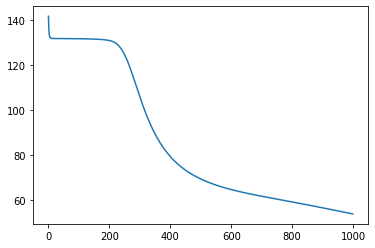

In [199]:
plt.plot(history)

In [201]:
_,_,_,o = forward(test_x)
print("predicted classes", np.argmax(o,axis=1))
print("ground classes   ", test_y)

predicted classes [2 2 0 0 1 1 2 2 0 0 0 0 0 0 1 0 1 2 1 0 2 2 2 2 2 1 2 1 2 2]
ground classes    [2 2 0 0 1 1 2 2 0 0 0 0 0 0 1 0 1 2 1 0 1 2 2 1 1 1 2 1 2 2]
